In [1]:
from water import WaterTreatment
from signals import SignalHandler, SignalReff, SignalZoom, Signals
import constants as c
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.optimize import curve_fit
from scipy import integrate
import uncertainties.unumpy as unp
import seaborn as sns
colors = sns.color_palette("Set2")


params = {
    'figure.figsize': (10, 5),
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'axes.axisbelow': True,
    'legend.fontsize': 15,
    'xtick.labelsize': 12.5,
    'ytick.labelsize': 12.5,
    'axes.labelsize': 17.5,
}
sns.set_palette("Set2")
plt.rcParams.update(params)


24+/-9


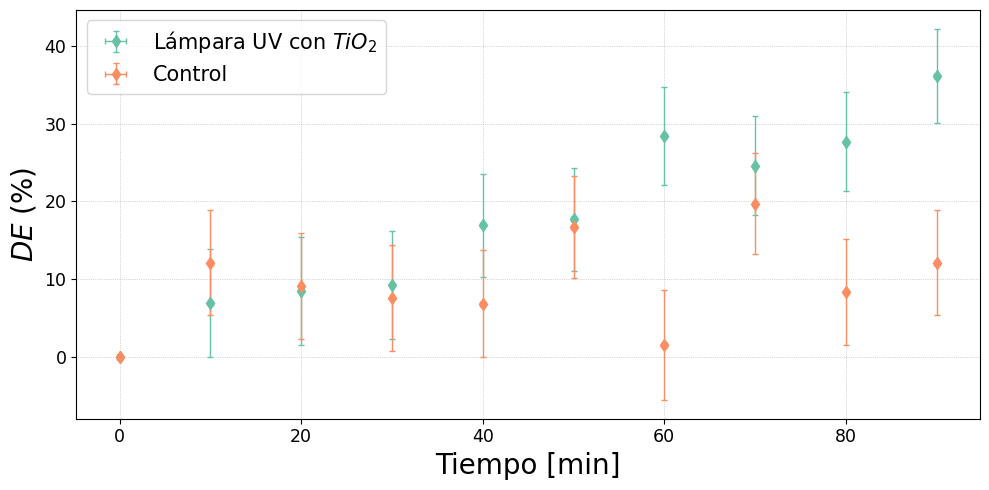

In [3]:
lampara = WaterTreatment('31-10/tratamiento-uv_TiO2_fino-vidrio-1ppm')
lampara.plot_degradation('Lámpara UV con $TiO_2$')
control = WaterTreatment('31-10/control-uv_TiO2_fino_vidrio-1ppm')
control.plot_degradation('Control')
print(lampara.DE[-1] - control.DE[-1])
plt.savefig("Tratamiento-UV_estanco.pdf", dpi=300, format='pdf', bbox_inches='tight')


                    
                    06-06/tratamiento-e5
                    I = 0.43+/-0.13 mA
                    V_cc = 6.8641+/-0.0027 kV
                    V_ac = 15.385+/-0.008 kV
                    P = 1.1+/-0.5 W
                    DE = 90.31+/-1.36 %
                    Y = 0.72+/-0.35 g/kWh
                

                    
                    11-06/tratamiento-e3
                    I = 0.37+/-0.12 mA
                    V_cc = 7.0561+/-0.0028 kV
                    V_ac = 15.303+/-0.008 kV
                    P = 1.0+/-0.6 W
                    DE = 88.24+/-1.27 %
                    Y = 0.77+/-0.46 g/kWh
                

                    
                    04-06/tratamiento-e4
                    I = 0.46+/-0.18 mA
                    V_cc = 6.5942+/-0.0028 kV
                    V_ac = 15.424+/-0.008 kV
                    P = 0.88+/-0.35 W
                    DE = 84.75+/-1.37 %
                    Y = 0.83+/-0.34 g/kWh
                


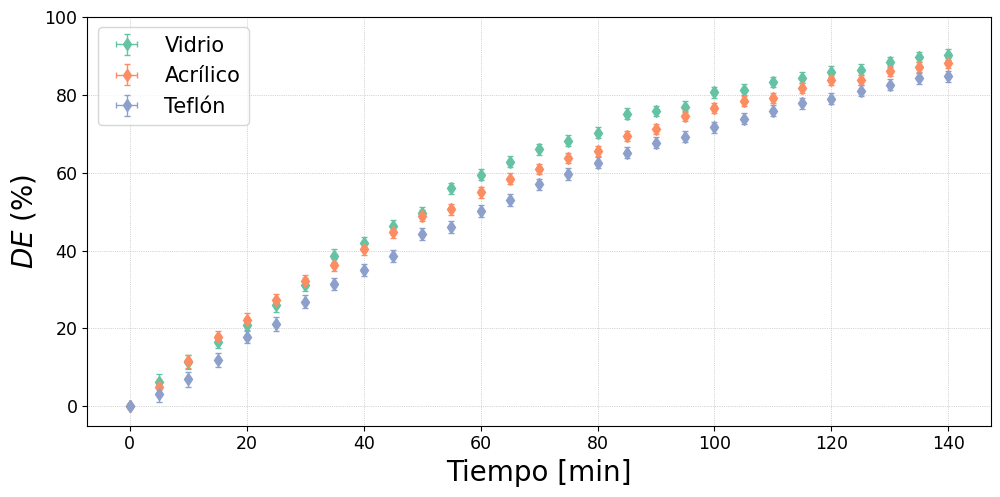

In [24]:
e4 = WaterTreatment('04-06/tratamiento-e4')
e3 = WaterTreatment('11-06/tratamiento-e3')
e5 = WaterTreatment('06-06/tratamiento-e5')

e5.plot_degradation('Vidrio')
e3.plot_degradation('Acrílico')
e4.plot_degradation('Teflón')

print(e5)
print(e3)
print(e4)
plt.ylim(-5,100)
plt.savefig("D2.Tratamiento Dieléctricos.pdf", dpi=300, format='pdf', bbox_inches='tight')


                    
                    05-07/tratamiento-e4-e6-vidrio/zoom
                    I = 3.3+/-1.8 mA
                    V_cc = 6.7440+/-0.0026 kV
                    V_ac = 15.719+/-0.008 kV
                    P = 4.5+/-2.3 W
                    DE = 87.27+/-1.28 %
                    Y = 1.67+/-0.86 g/kWh
                

                    
                    05-07/tratamiento-e4-e6-titanio
                    I = 3.8+/-1.5 mA
                    V_cc = 6.8938+/-0.0025 kV
                    V_ac = 15.722+/-0.007 kV
                    P = 5.2+/-2.0 W
                    DE = 88.30+/-1.37 %
                    Y = 1.46+/-0.58 g/kWh
                

                    
                    18-06/tratamiento-e4-vidrio
                    I = 1.0+/-3.4 mA
                    V_cc = 6.8444+/-0.0027 kV
                    V_ac = 15.509+/-0.007 kV
                    P = 0.48+/-0.31 W
                    DE = 72.55+/-1.41 %
                    Y = 13.02+/-8.50 g/kWh
   

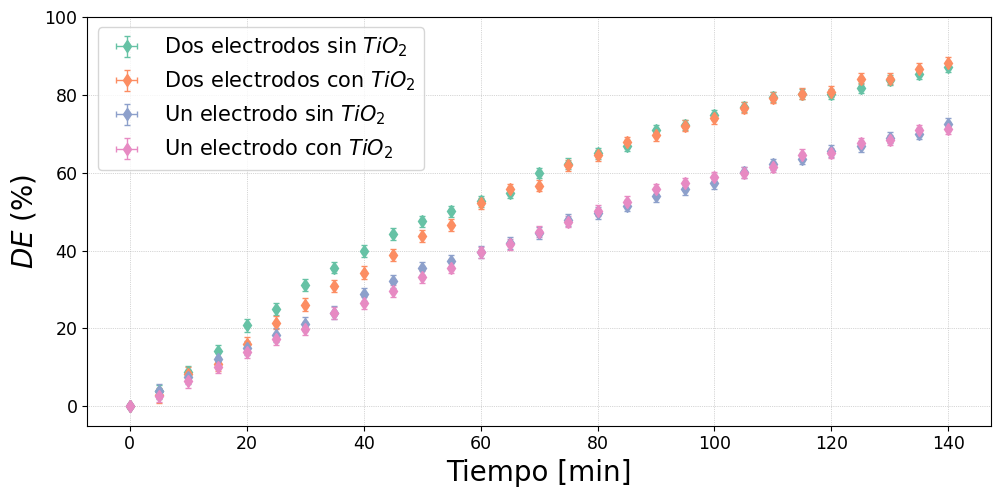

In [2]:
e4_vidrio = WaterTreatment('18-06/tratamiento-e4-vidrio')
e4_TiO2 = WaterTreatment('25-06/tratamiento-e4-TiO2')
e4e6_vidrio = WaterTreatment('05-07/tratamiento-e4-e6-vidrio/zoom')
e4e6_TiO2 = WaterTreatment('05-07/tratamiento-e4-e6-titanio')

e4e6_vidrio.plot_degradation('Dos electrodos sin $TiO_2$')
e4e6_TiO2.plot_degradation('Dos electrodos con $TiO_2$')
e4_vidrio.plot_degradation('Un electrodo sin $TiO_2$')
e4_TiO2.plot_degradation('Un electrodo con $TiO_2$')

print(e4e6_vidrio)
print(e4e6_TiO2)
print(e4_vidrio)
print(e4_TiO2)

plt.ylim(-5,100)
plt.savefig("D3.Tratamiento Titanio.pdf", dpi=300, format='pdf', bbox_inches='tight')


In [25]:
e4 = WaterTreatment('04-06/tratamiento-e4')
e4_vidrio = WaterTreatment('18-06/tratamiento-e4-vidrio')
e4_TiO2 = WaterTreatment('25-06/tratamiento-e4-TiO2')
e4e6_vidrio = WaterTreatment('05-07/tratamiento-e4-e6-vidrio/zoom')
e4e6_TiO2 = WaterTreatment('05-07/tratamiento-e4-e6-titanio')


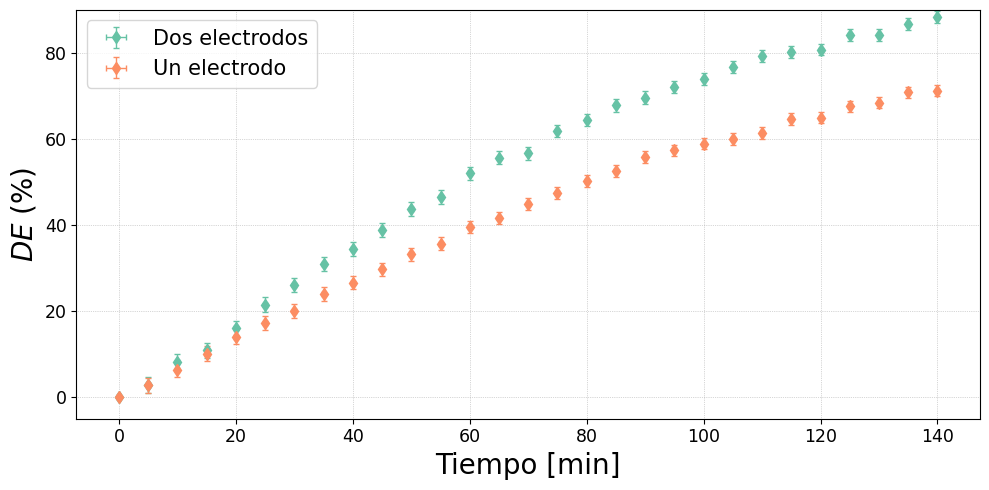

In [46]:
#e4.plot_degradation('Un electrodo sin $TiO_2$ y sin vidrio')
#e4e6_vidrio.plot_degradation('Dos electrodos')
#e4_vidrio.plot_degradation('Un electrodo')
e4e6_TiO2.plot_degradation('Dos electrodos')
e4_TiO2.plot_degradation('Un electrodo')

#print(e4e6_vidrio)
#print(e4e6_TiO2)
#print(e4_vidrio)
#print(e4_TiO2)
plt.ylim(-5, 90)
plt.savefig("A9.Tratamiento_con_TiO2.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.legend(loc='upper left')


                    
                    03-12/tratamiento-thanos_150ml_1ppm
                    I = 0.182+/-0.020 mA
                    V_cc = 11.2943+/-0.0010 kV
                    V_ac = 14.7050+/-0.0028 kV
                    P = 0.49+/-0.08 W
                    DE = 99.20+/-5.33 %
                    Y = 0.18+/-0.04 g/kWh
                

                    
                    26-11/tratamiento_e4_uv-TiO2-fino-vidrio-150ml-1ppm
                    I = 0.163+/-0.016 mA
                    V_cc = 11.0640+/-0.0010 kV
                    V_ac = 14.8826+/-0.0028 kV
                    P = 0.43+/-0.09 W
                    DE = 57.69+/-5.57 %
                    Y = 0.20+/-0.05 g/kWh
                


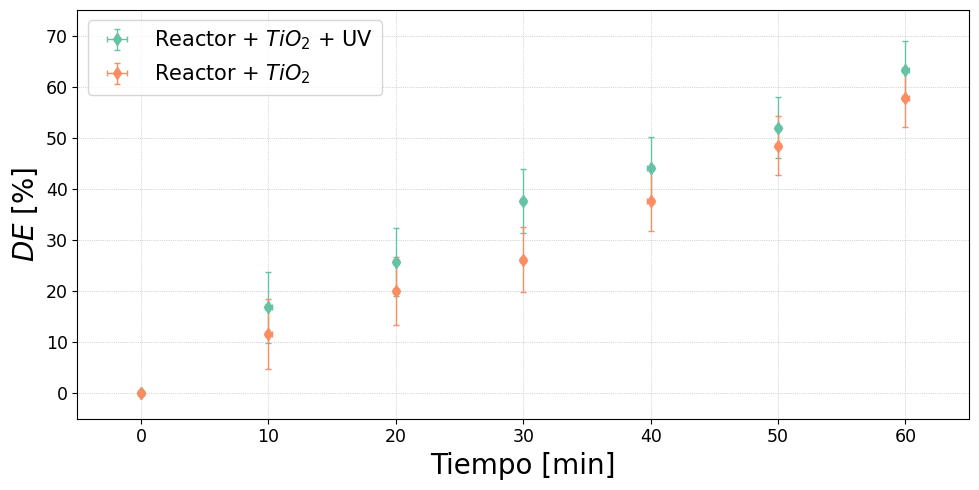

In [3]:
#e4_solo = WaterTreatment('31-10/tratamiento_e4-150ml-1ppm')
e4_todo = WaterTreatment('03-12/tratamiento-thanos_150ml_1ppm')
#e4_solo_10ppm = WaterTreatment('04-06/tratamiento-e4')
e4_solo = WaterTreatment('26-11/tratamiento_e4_uv-TiO2-fino-vidrio-150ml-1ppm')

e4_todo.plot_degradation('Reactor + $TiO_2$ + UV')
e4_solo.plot_degradation('Reactor + $TiO_2$')
#e4_solo_10ppm.plot_degradation('Reactor - 10ppm')
print(e4_todo)
print(e4_solo)
plt.xlim(-5, 65)
plt.ylim(-5, 75)
plt.savefig("Reactor Híbrido.pdf", dpi=300, format='pdf', bbox_inches='tight')


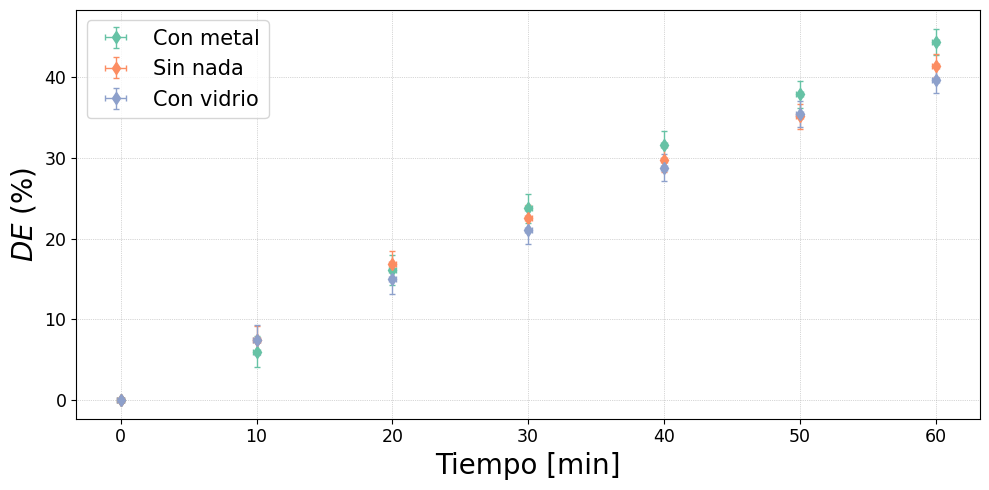

In [3]:
e4_solo = WaterTreatment('24-09/tratamiento_e4-10ppm-150ml')
e4_metal = WaterTreatment('24-09/tratamiento_e4-Metal-10ppm-150ml')
e4_vidrio = WaterTreatment('18-06/tratamiento-e4-vidrio', half_series=True)

e4_metal.plot_degradation('Con metal')
e4_solo.plot_degradation('Sin nada')
e4_vidrio.plot_degradation('Con vidrio')


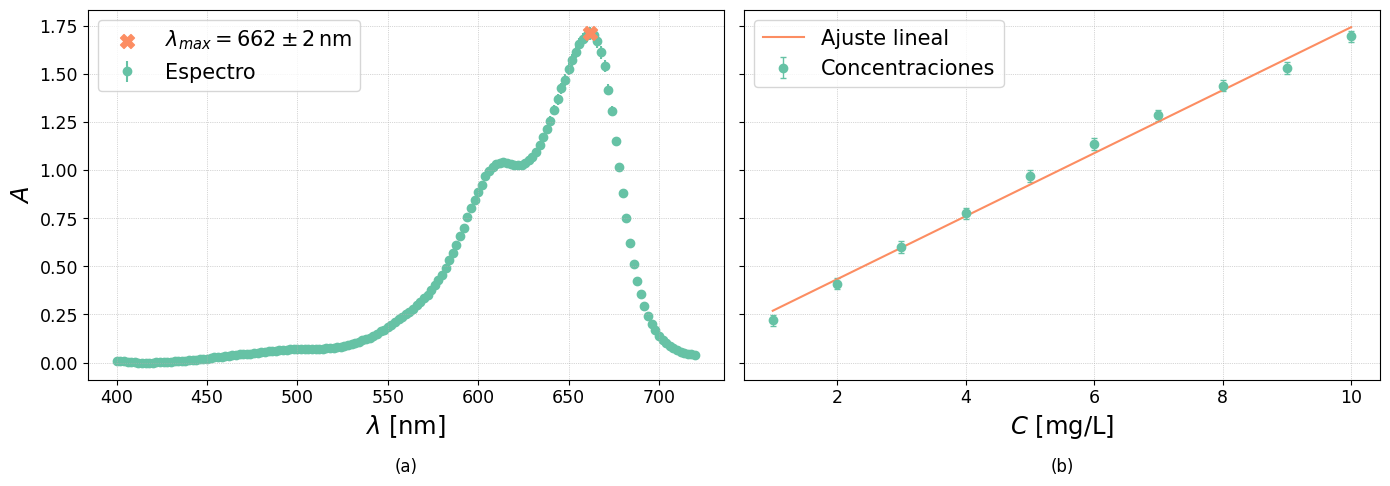

In [31]:
absor = np.loadtxt(os.path.join(c.ROOT, '04-06/400-720 nm, 2 nm.txt'), skiprows=1).T
long = np.arange(400, 722, 2)
concent_azul, absorb_azul = np.loadtxt(os.path.join(c.ROOT, '27-06/concentracion-absorbancia.txt'), skiprows=1).T


# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# First subplot: long vs absor
axs[0].errorbar(long, absor, np.abs(absor) * c.A_ERR, fmt='o', zorder=0, markersize=6, label='Espectro')
axs[0].scatter(662, np.max(absor), marker='X', color=colors[1], s=100, label=r'$\lambda_{max} = 662 \pm 2 \, \text{nm}$', zorder=1)
axs[0].set_xlabel('$\lambda$ [nm]')
axs[0].set_ylabel('$A$')
axs[0].legend()

# Second subplot: concent_azul vs absorb_azul
axs[1].errorbar(concent_azul, absorb_azul, np.ones(len(absorb_azul)) * 0.03, elinewidth=1, capsize=2, capthick=1, ls='none', label='Concentraciones', fmt='o', markersize=6)
m, b = np.polyfit(concent_azul, absorb_azul, 1)
axs[1].plot(concent_azul, m * concent_azul + b, label='Ajuste lineal', color=colors[1])
axs[1].set_xlabel('$C$ [mg/L]')
axs[1].legend()

# Add (a) and (b) labels below each subplot
axs[0].text(0.5, -0.25, "(a)", transform=axs[0].transAxes, fontsize=12, ha='center')
axs[1].text(0.5, -0.25, "(b)", transform=axs[1].transAxes, fontsize=12, ha='center')

# Adjust layout and save
plt.tight_layout()
plt.savefig('LambertBeer.pdf', dpi=300, bbox_inches='tight')

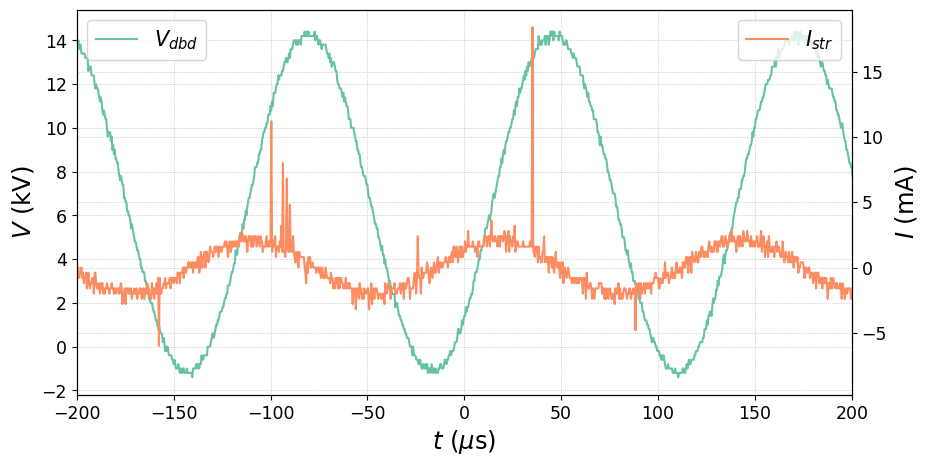

In [24]:
from signals import SignalReff
fig, ax1 = plt.subplots()
sr = SignalReff('04-06/tratamiento-e4/reff-tratamiento-e4 2024-06-04 17h 49m 35s.csv')
ax1.plot(sr.tV * 1000000, sr.V / 1000, label='$V_{dbd}$', color=colors[0])
ax1.set_xlabel('$t$ ($\mu$s)')
ax1.set_ylabel('$V$ (kV)')
ax2 = ax1.twinx()
ax2.plot(sr.tI * 1000000, sr.I * 1000, label='$I_{str}$', color=colors[1])
ax2.set_ylabel('$I$ (mA)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xlim(-200, 200)
plt.savefig('Señales Típicas.pdf', dpi=300, bbox_inches='tight')

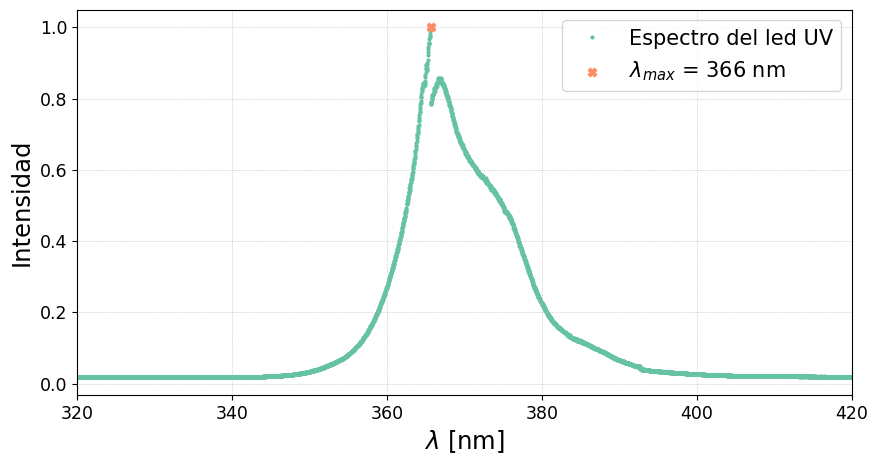

In [42]:
colors = sns.color_palette("Set2")
wavelength, counts = np.loadtxt(os.path.join(c.ROOT, '07-11/espectro-uv/led/1.3s-10.5V.txt'), skiprows=2).T
plt.plot(wavelength, counts / np.max(counts), '.', label='Espectro del led UV', color=colors[0], markersize=4, zorder=0)
max_wavelength = wavelength[np.argmax(counts)]
plt.scatter(max_wavelength, 1, marker='X', label=f'$\lambda_{{max}}$ = {max_wavelength:.0f} nm', color=colors[1], zorder=1)
plt.xlim(320,420)
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('Intensidad')
plt.legend()
plt.savefig('Espectro led UV.pdf')
plt.savefig('Espectro_UV.pdf', dpi=300, bbox_inches='tight')

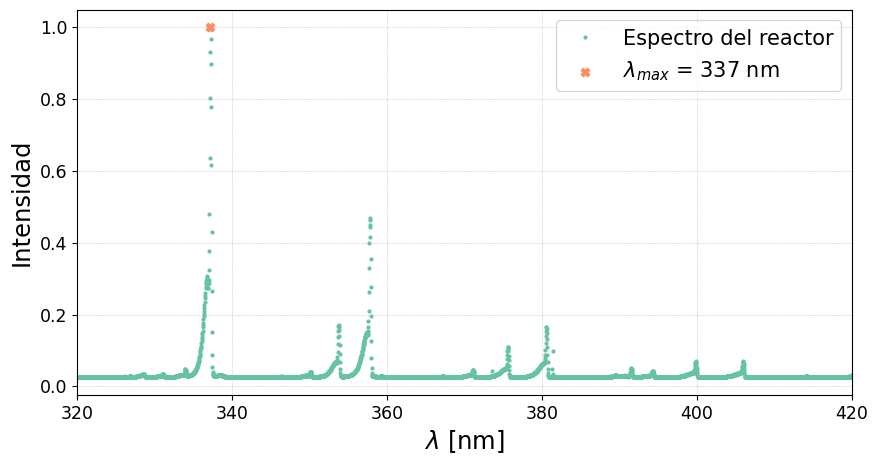

In [23]:
colors = sns.color_palette("Set2")
#wavelength, counts = np.loadtxt(os.path.join(c.ROOT, '07-11/espectro-uv/plasma/5s-16V-agua.txt'), skiprows=2).T
#plt.plot(wavelength, counts / np.max(counts), '.', label='Espectro del reactor con agua', markersize=4)
wavelength, counts = np.loadtxt(os.path.join(c.ROOT, '07-11/espectro-uv/plasma/5s-16V-seco.txt'), skiprows=2).T
plt.plot(wavelength, counts / np.max(counts), '.', label='Espectro del reactor', markersize=4, zorder=0)
max_wavelength = wavelength[np.argmax(counts)]
plt.scatter(max_wavelength, 1, marker='X', label=f'$\lambda_{{max}}$ = {max_wavelength:.0f} nm', color=colors[1], zorder=1)
plt.xlim(320,420)
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('Intensidad')
plt.legend()
plt.savefig('Espectro led UV.pdf')
plt.savefig('Espectro_UV.pdf', dpi=300, bbox_inches='tight')

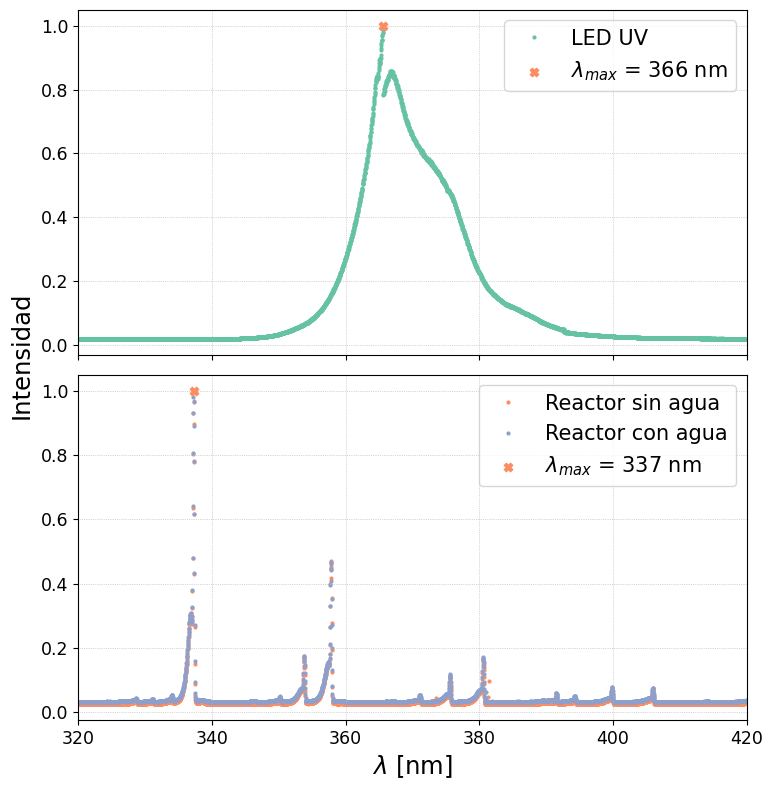

In [14]:
colors = sns.color_palette("Set2")

# Create a figure with two subplots sharing the x-axis
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# First subplot: UV LED spectrum
wavelength, counts = np.loadtxt(
    os.path.join(c.ROOT, '07-11/espectro-uv/led/1.3s-10.5V.txt'), 
    skiprows=2
).T
axes[0].plot(wavelength, counts / np.max(counts), '.', label='LED UV', color=colors[0], markersize=4, zorder=0)
max_wavelength = wavelength[np.argmax(counts)]
axes[0].scatter(max_wavelength, 1, marker='X', label=f'$\lambda_{{max}}$ = {max_wavelength:.0f} nm', color=colors[1], zorder=1)
axes[0].legend()

# Second subplot: Reactor spectrum
wavelength, counts = np.loadtxt(
    os.path.join(c.ROOT, '07-11/espectro-uv/plasma/5s-16V-seco.txt'), 
    skiprows=2
).T
axes[1].plot(wavelength, counts / np.max(counts), '.', label='Reactor sin agua', color=colors[1], markersize=4, zorder=0)
wavelength, counts = np.loadtxt(
    os.path.join(c.ROOT, '07-11/espectro-uv/plasma/5s-16V-agua.txt'),
    skiprows=2
).T
axes[1].plot(wavelength, counts / np.max(counts), '.', label='Reactor con agua', color=colors[2], markersize=4, zorder=0)
max_wavelength = wavelength[np.argmax(counts)]
axes[1].scatter(max_wavelength, 1, marker='X', label=f'$\lambda_{{max}}$ = {max_wavelength:.0f} nm', color=colors[1], zorder=1)
axes[1].set_xlim(320, 420)
axes[1].set_xlabel('$\lambda$ [nm]')
axes[1].legend()

# Add a shared y-axis label
fig.text(0.04, 0.55, 'Intensidad', va='center', rotation='vertical', fontsize=17.5)

# Adjust layout and save the figure
plt.tight_layout(rect=[0.06, 0, 1, 1])  # Leave space for the shared y-axis label
plt.savefig('Espectro_comparativo.pdf', dpi=300, bbox_inches='tight')
plt.show()

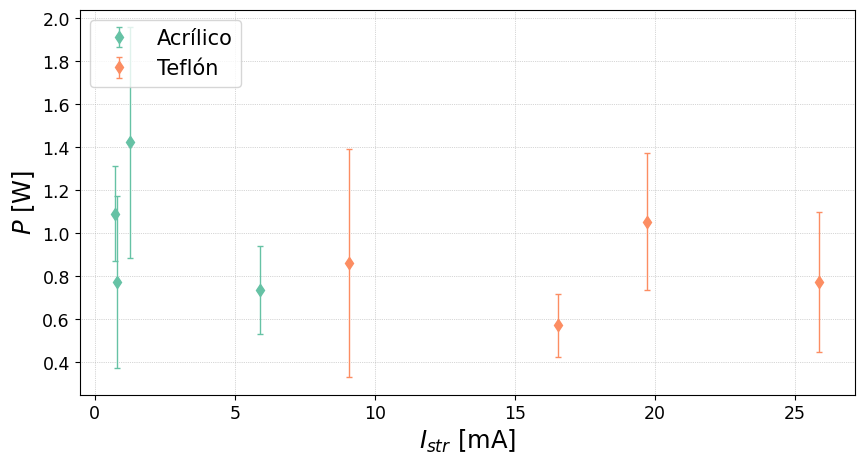

In [22]:
def plot(folder, color, label=None):
    s = Signals(folder)
    plt.errorbar(unp.nominal_values(s.I_avg) * 1000, unp.nominal_values(s.P_avg), unp.std_devs(s.P_avg), c=color, label=label, fmt='d', elinewidth=1, capsize=2, capthick=1)
    plt.xlabel('$I_{str}$ [mA]')
    plt.ylabel('$P$ [W]')



plot('10-05/e2/13.0V', colors[0], 'Acrílico') # e2
plot('10-05/e2/13.5V', colors[0])
plot('10-05/e2/14.0V', colors[0])
plot('10-05/e2/14.5V', colors[0])

plot('10-05/e4/11.5V', colors[1], 'Teflón') # e4
plot('10-05/e4/12.0V', colors[1])
plot('10-05/e4/12.5V', colors[1])
plot('10-05/e4/13.0V', colors[1])

# plot('28-05/vidrio/12.0', colors[2], 'Vidrio') # e5
# plot('28-05/vidrio/12.5', colors[2])
# plot('28-05/vidrio/13.0', colors[2])
# plot('28-05/vidrio/13.5', colors[2])
# plot('28-05/vidrio/14.0', colors[2])
# plot('28-05/vidrio/14.5', colors[2])
# plot('28-05/vidrio/15.0', colors[2])

plt.legend(loc='upper left')
plt.savefig('Potencias.pdf', dpi=300, bbox_inches='tight')

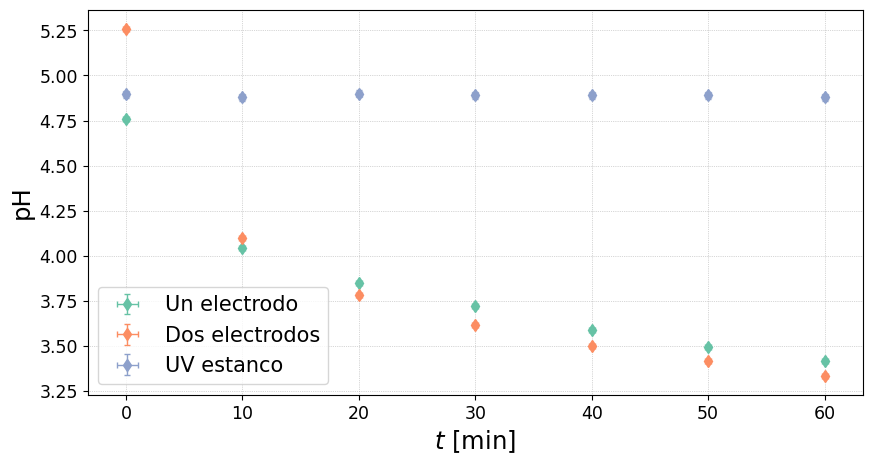

In [7]:
e4 = WaterTreatment('05-11/pH_e4-150ml-1ppm', data_column=1)
e4.plot_absorbance('Un electrodo')
e4e6 = WaterTreatment('05-11/pH_e4e6-150ml-1ppm', data_column=1)
e4e6.plot_absorbance('Dos electrodos')
uv = WaterTreatment('21-11/pH_reactor_uv_150ml', data_column=1)
uv.plot_absorbance('UV estanco')
plt.ylabel('pH')
plt.legend()

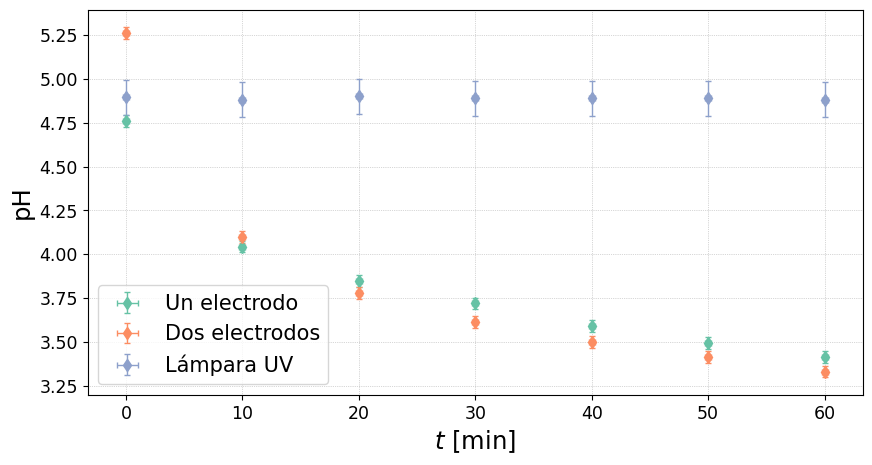

In [6]:
e4 = WaterTreatment('05-11/pH_e4-150ml-1ppm', data_column=1, absorbance_error=0.1)
e4.plot_absorbance('Un electrodo')
e4e6 = WaterTreatment('05-11/pH_e4e6-150ml-1ppm', data_column=1, absorbance_error=0.1)
e4e6.plot_absorbance('Dos electrodos')
uv = WaterTreatment('21-11/pH_reactor_uv_150ml', data_column=1, absorbance_error=0.1)
uv.plot_absorbance('Lámpara UV')
plt.ylabel('pH')
plt.legend()
plt.savefig('pH.pdf', dpi=300, bbox_inches='tight')

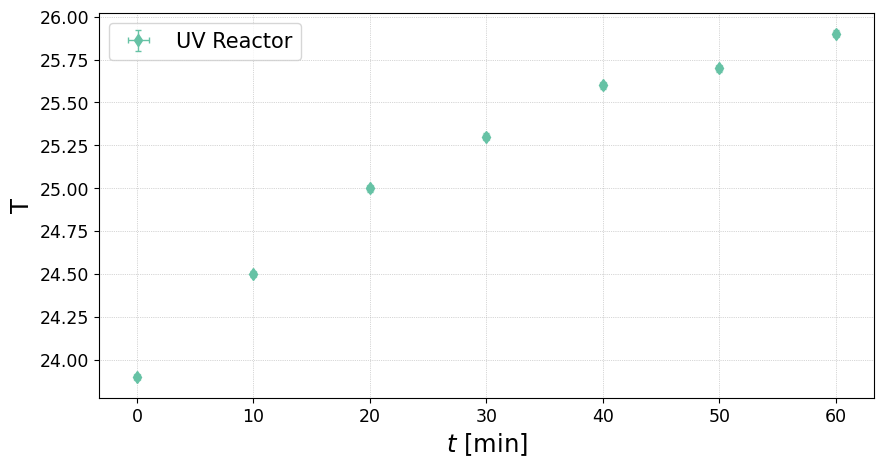

In [22]:
pH = WaterTreatment('21-11/pH_reactor_uv_150ml', data_column=1)
pH.plot_absorbance('UV Reactor')
T = WaterTreatment('21-11/pH_reactor_uv_150ml', data_column=2)
T.plot_absorbance('UV Reactor')
plt.ylabel('T')
plt.legend()

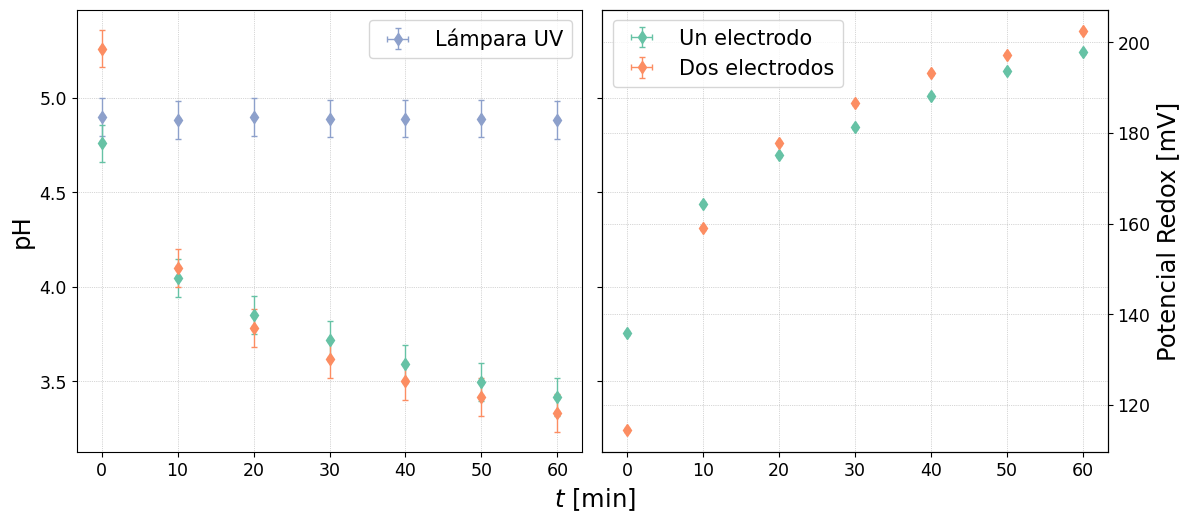

In [18]:
e4_pH = WaterTreatment('05-11/pH_e4-150ml-1ppm', data_column=1, absorbance_error=0.3)
e4e6_pH = WaterTreatment('05-11/pH_e4e6-150ml-1ppm', data_column=1, absorbance_error=0.3)
e4_V = WaterTreatment('05-11/pH_e4-150ml-1ppm', data_column=3, absorbance_error=1)
e4e6_V = WaterTreatment('05-11/pH_e4e6-150ml-1ppm', data_column=3, absorbance_error=1)


pH = WaterTreatment('21-11/pH_reactor_uv_150ml', data_column=1, absorbance_error=0.1)
T = WaterTreatment('21-11/pH_reactor_uv_150ml', data_column=2, absorbance_error=0.1)

fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

plt.sca(ax_left) 
pH.plot_absorbance('Lámpara UV', color=colors[2])
plt.legend()
e4_pH.plot_absorbance('Un electrodo', color=colors[0])
e4e6_pH.plot_absorbance('Dos electrodos', color=colors[1])
plt.ylabel('pH')
plt.xlabel('')

plt.sca(ax_right)
plt.ylabel('')
plt.xlabel('')

ax2 = ax_right.twinx()
e4_V.plot_absorbance('Un electrodo', color=colors[0])
e4e6_V.plot_absorbance('Dos electrodos', color=colors[1])
ax2.set_ylabel('Potencial Redox [mV]')
plt.legend()

fig.text(0.5, -0.01, '$t$ [min]', ha='center', va='center', fontsize=17.5)

fig.tight_layout()
plt.savefig('pH.pdf', dpi=300, bbox_inches='tight')
plt.show()


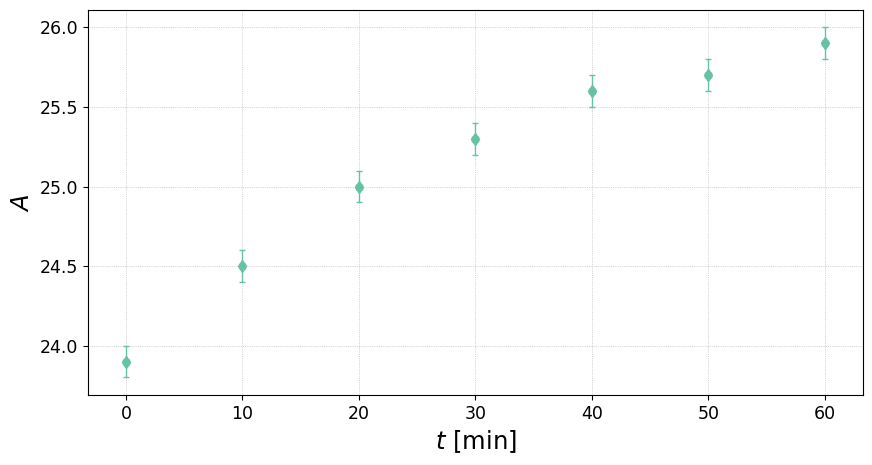

In [19]:
T.plot_absorbance()